In [2]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob 
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
EMO = "/content/drive/MyDrive/Speech Emotion analysis/Emo-db/"
# Run one example 
dir_list = os.listdir(EMO)
dir_list[0:5]

['08a01Ab.wav', '12a01Fb.wav', '03a01Fa.wav', '09a01Fa.wav', '08a01Na.wav']

In [ ]:
# Get the data location for SAVEE
dir_list = os.listdir(EMO)

# Get the data location for SAVEE
dir_list = os.listdir(EMO)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if ((i[-6:-5]=='W') or (i[-6:-5]=='E') or (i[-6:-5]=='A') or (i[-6:-5]=='L') or ( i[-6:-5]=='T')) :
        emotion.append('Negative')
    elif i[-6:-5]=='F':
        emotion.append('Positive')
    elif i[-6:-5]=='N':
        emotion.append('Neutral')
    else:
        emotion.append('Unknown') 
    path.append(EMO + i)

# Now check out the label count distribution 
EMO_df = pd.DataFrame(emotion, columns = ['labels'])
EMO_df['source'] = 'EMO'
EMO_df = pd.concat([EMO_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
EMO_df.labels.value_counts()


Negative    385
Neutral     79 
Positive    71 
Name: labels, dtype: int64

In [4]:
# Get the data location for EMO
dir_list = os.listdir(EMO)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if  (i[-6:-5]=='W') :
        emotion.append('Angry')
    elif (i[-6:-5]=='E') :
        emotion.append('Disgust')    
    elif i[-6:-5]=='F':
        emotion.append('Happy')
    elif (i[-6:-5]=='L') :
        emotion.append('Boredom')
    elif (i[-6:-5]=='T') :
        emotion.append('Sadness') 
    elif i[-6:-5]=='A':
        emotion.append('Fear')
    elif i[-6:-5]=='N':
        emotion.append('Neutral')
    else:
        emotion.append('Unknown') 
    path.append(EMO + i)

# Now check out the label count distribution 
EMO_df = pd.DataFrame(emotion, columns = ['emotion'])
EMO_df['source'] = 'EMO'
EMO_df = pd.concat([EMO_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
EMO_df.emotion.value_counts()

Angry      127
Boredom     81
Neutral     79
Happy       71
Fear        69
Sadness     62
Disgust     46
Name: emotion, dtype: int64

In [6]:
df = pd.concat([EMO_df], axis = 0)
print(df.emotion.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

Angry      127
Boredom     81
Neutral     79
Happy       71
Fear        69
Sadness     62
Disgust     46
Name: emotion, dtype: int64


In [7]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("./Data_path.csv")
ref.head(30)

,emotion,source,path
0,Fear,EMO,/content/drive/MyDrive/Speech Emotion analysis...
1,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis...
2,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis...
3,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis...
4,Neutral,EMO,/content/drive/MyDrive/Speech Emotion analysis...
5,Angry,EMO,/content/drive/MyDrive/Speech Emotion analysis...
6,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis...
7,Neutral,EMO,/content/drive/MyDrive/Speech Emotion analysis...
8,Angry,EMO,/content/drive/MyDrive/Speech Emotion analysis...
9,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis...


In [8]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)
df.sample(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,emotion,source,path
458,Disgust,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/13b10Ec.wav
235,Fear,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/10a07Ad.wav
281,Sadness,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/03b02Tb.wav
55,Fear,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/10a02Ab.wav
284,Sadness,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08b02Tc.wav
...,...,...,...
60,Sadness,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a02Tb.wav
452,Angry,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/10b10Wa.wav
204,Boredom,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/14a05Lb.wav
371,Sadness,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/15b03Tc.wav


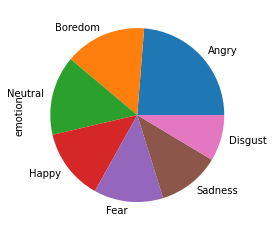

In [10]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie') 

In [ ]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['mfcc'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=4
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

535


,mfcc
0,"[-1.4226983, -5.1921697, -18.412956, -15.917318, -16.4665, -17.161377, -16.876139, -15.974901, -17.366405, -19.70112, -20.025501, -20.153008, -18.553795, -15.991873, -14.700194, -15.87136, -17.669598, -19.498463, -18.699295, -15.734385, -14.978068, -17.150799, -23.966728, -25.612007, -29.255196, -30.354208, -17.955532, -8.170925, -6.72879, -12.660345, -17.000038, -19.178062, -16.880379, -14.524214, -13.217569, -13.332845, -14.065657, -17.652372, -23.65731, -18.515553, -9.570139, -6.391362, -10.681873, -16.90446, -17.098467, -17.101683, -13.330002, -15.963587, -19.16959, -16.157942, -14.586116, -15.260391, -12.438419, -11.913859, -13.440423, -15.940216, -17.362411, -18.20986, -17.948479, -19.182402, -18.822157, -19.373997, -19.732166, -19.579624, -21.349882, -18.224068, -13.181223, -13.062391, -19.773447, -22.556108, -24.064566, -24.722015, -25.925821, -24.993673, -24.6153, -24.547127, -21.06956, -14.542011, -6.7789326, -7.809978, -14.19436, -11.684913, -12.264735, -8.95258, -9.237412, -10.887539, -12.565922, -12.786439, -12.345601, -11.40117, -10.4408655, -9.053591, -10.754396, -12.60524, -12.982712, -13.575307, -13.061082, -10.973052, -6.5354743, -6.7902756, ...]"
1,"[-10.584921, -12.9713545, -16.466398, -16.88867, -18.54854, -16.23482, -14.986852, -14.662053, -14.73084, -14.967982, -14.958076, -15.966945, -15.935883, -15.016445, -15.418452, -14.812571, -13.893926, -16.266521, -18.736824, -21.690826, -22.85118, -23.507717, -23.340506, -26.194529, -19.276918, -14.129338, -12.675943, -14.7737055, -13.174459, -12.276903, -13.833943, -14.615975, -13.501339, -14.356277, -14.717122, -15.941103, -17.826397, -21.961906, -35.11105, -29.104319, -16.678072, -14.211834, -16.609402, -16.17416, -15.07095, -14.664901, -13.63535, -11.6019, -11.43421, -13.672018, -15.619792, -16.594557, -18.238892, -20.88756, -27.745129, -24.351223, -17.95103, -12.958385, -11.025253, -11.614544, -10.634528, -10.338496, -11.612281, -12.591996, -13.558929, -15.924643, -19.284075, -17.109478, -16.713753, -18.231787, -17.597527, -15.838705, -17.592476, -28.757698, -31.532997, -30.976868, -28.755367, -28.568483, -22.102114, -15.7683525, -13.513718, -16.705994, -19.263765, -18.308113, -17.265495, -17.344032, -16.226036, -14.369604, -13.152949, -12.044429, -11.753569, -12.546568, -13.29649, -13.614038, -14.638854, -15.606559, -16.050688, -18.42812, -19.12262, -19.92969, ...]"
2,"[-20.45626, -17.734709, -19.502829, -21.832008, -23.387789, -21.75306, -15.963073, -14.486982, -13.725149, -12.62819, -13.695652, -12.532296, -13.809492, -13.447063, -13.660376, -13.5284, -12.931372, -9.550752, -9.266426, -11.678395, -13.182403, -16.394468, -14.849789, -15.332548, -18.008747, -16.11583, -15.202125, -22.81662, -28.646664, -14.103831, -9.984569, -14.455115, -15.477988, -12.169917, -10.14152, -8.702267, -8.526705, -9.685619, -8.937926, -13.249582, -12.992452, -7.3144283, -10.60222, -25.554373, -22.80545, -11.884688, -6.7674484, -6.6133275, -10.19496, -10.935319, -10.205502, -10.949601, -14.246447, -13.806998, -13.530095, -14.946862, -16.846956, -22.867458, -21.12367, -11.736974, -7.0809455, -6.3867545, -8.665066, -9.407943, -10.864842, -11.752364, -13.663966, -15.40471, -18.20392, -20.375813, -19.617756, -16.262016, -16.509247, -17.088161, -21.336208, -22.80426, -22.654167, -22.639055, -23.185446, -22.43685, -22.842384, -26.781301, -22.104322, -21.565573, -21.651064, -18.814587, -19.874443, -25.748068, -23.83878, -12.83551, -7.2539206, -4.551418, -3.1139789, -3.22208, -3.5887911, -3.1054442, -2.6947145, -3.5295825, -4.877421, -6.7647123, ...]"
3,"[-32.930805, -30.281254, -25.923601, -27.001451, -31.736128, -34.898853, -36.900383, -38.35568, -38.43499, -37.92345, -35.275845, -27.334927, -27.143463, -31.251753, -33.671894, -33.551746, -30.505663, -31.15691, -28.715218, -27.075264, -26.63156, -28.722445, -32.423668, -25.067068, -19.921648, -21.529198, -24.301605, -28.394442, -29.333748, -29.89457, -30.742016, -27.62299, -22.987108, -22.050667, -25.77415, -34.749733, -41.2

In [11]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.6
                                 )
    sample_rate = np.array(sample_rate)
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=X).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    df.loc[counter] = [result]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

535


,Features
0,"[0.05777397505733945, 0.586082398891449, 0.6152151226997375, 0.6562894582748413, 0.6281009912490845, 0.5701488256454468, 0.5710948705673218, 0.5795491337776184, 0.5945385694503784, 0.56557297706604, 0.524875819683075, 0.5045155882835388, 0.5351535081863403, -310.3546447753906, 139.00730895996094, -55.04197692871094, 16.74115562438965, 11.58719253540039, -17.777070999145508, 22.503644943237305, -5.341231346130371, -19.94681739807129, 6.982422351837158, -7.9919633865356445, -9.833816528320312, 1.7599420547485352, 0.0993134155869484, 0.1984141319990158, 0.1449993997812271, 0.05289326608181, 0.051761701703071594, 1.707051396369934, 9.507131576538086, 10.731134414672852, 11.767948150634766, 50.837406158447266, 33.7457275390625, 13.99305248260498, 6.972074031829834, 1.4500283002853394, 0.6586875319480896, 0.8262200951576233, 1.78072988986969, 2.9432952404022217, 13.42072868347168, 17.201601028442383, 28.659412384033203, 21.798768997192383, 9.814350128173828, 7.261050224304199, 4.2939958572387695, 9.087010383605957, 10.148853302001953, 8.217720031738281, 4.303750038146973, 3.1475253105163574, 3.815653085708618, 4.928484916687012, 6.249032497406006, 3.946610450744629, 3.167839765548706, 1.657740831375122, 1.9833298921585083, 3.7091028690338135, 3.7960619926452637, 2.278838634490967, 1.2819985151290894, 1.598659634590149, 3.789564847946167, 4.7671284675598145, 4.417330265045166, 2.954249143600464, 2.8560099601745605, 2.0876271724700928, 1.2915230989456177, 0.7738057374954224, 0.8860181570053101, 0.8742000460624695, 1.2656359672546387, 1.38097083568573, 1.2687512636184692, 0.9446009993553162, 0.6432421207427979, 0.2738301455974579, 0.1626547873020172, 0.2076529562473297, 0.20225846767425537, 0.22027508914470673, 0.21680548787117004, 0.16227075457572937, 0.08358684927225113, 0.0756581649184227, 0.0506390817463398, 0.031222641468048096, 0.024982651695609093, 0.025743884965777397, 0.023042060434818268, 0.025846390053629875, 0.0419347919523716, 0.07333710044622421, ...]"
1,"[0.04610002150229358, 0.5395984649658203, 0.5905106663703918, 0.676882266998291, 0.7715346217155457, 0.8063941597938538, 0.746746301651001, 0.7028239369392395, 0.658942699432373, 0.6236286759376526, 0.555809497833252, 0.50397789478302, 0.5085827708244324, -384.71588134765625, 172.79893493652344, -50.14600372314453, 13.41358757019043, 31.83006477355957, -16.284534454345703, -1.1583129167556763, 1.7350513935089111, -0.4748687744140625, -2.156524181365967, -18.894174575805664, -0.19398240745067596, 8.232285499572754, 0.04417267069220543, 0.01793109066784382, 0.03109520673751831, 0.1466454267501831, 0.751518726348877, 1.096673846244812, 0.3084096312522888, 0.4358287751674652, 1.1577272415161133, 2.5757062435150146, 6.220500469207764, 4.7601823806762695, 1.2052502632141113, 2.787388563156128, 3.5640931129455566, 1.1064833402633667, 0.7358012199401855, 1.6546815633773804, 2.4267499446868896, 1.190848708152771, 1.8352916240692139, 3.6910364627838135, 4.325072288513184, 2.1688122749328613, 1.6933804750442505, 2.2090578079223633, 1.268696904182434, 2.066096067428589, 1.546614170074463, 1.1995471715927124, 1.0488070249557495, 0.690972089767456, 0.5402703881263733, 0.43782252073287964, 0.6176995038986206, 1.190866470336914, 1.0440679788589478, 0.5715290904045105, 1.2756212949752808, 1.6808232069015503, 0.929942786693573, 0.7752775549888611, 0.821603000164032, 0.6697982549667358, 0.5059572458267212, 0.577198326587677, 0.47185173630714417, 0.20763354003429413, 0.22303682565689087, 0.19802282750606537, 0.21634089946746826, 0.12783180177211761, 0.08382636308670044, 0.06486710906028748, 0.026183469220995903, 0.04457627236843109, 0.09166122227907181, 0.03667791560292244, 0.03717401996254921, 0.04373420774936676, 0.09147462248802185, 0.21735569834709167, 0.4397522807121277, 0.7496911883354187, 0.9696199893951416, 0.7060702443122864, 0.5237149000167847, 0.3688947558403015, 0.2925024628639221, 0.34928199648857117, 0.27383774518966675, 0.150107741355896, 0.06763482093811035, 0.0

In [20]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(10)

,emotion,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154
0,Fear,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a01Ab.wav,0.057774,0.586082,0.615215,0.656289,0.628101,0.570149,0.571095,0.579549,0.594539,0.565573,0.524876,0.504516,0.535154,-310.354645,139.007309,-55.041977,16.741156,11.587193,-17.777071,22.503645,-5.341231,-19.946817,6.982422,-7.991963,-9.833817,1.759942,0.099313,0.198414,0.144999,0.052893,0.051762,1.707051,9.507132,10.731134,11.767948,50.837406,33.745728,...,0.260468,0.228049,0.208677,0.088494,0.040629,0.009594,0.000988,5.820636e-05,2.757811e-06,1.645290e-06,1.390142e-06,1.186137e-06,1.019390e-06,8.834733e-07,7.696988e-07,6.715505e-07,5.901725e-07,5.212867e-07,4.608206e-07,4.104473e-07,3.682864e-07,3.272697e-07,2.966591e-07,2.653106e-07,2.393838e-07,2.171340e-07,1.984822e-07,1.824350e-07,1.715234e-07,1.642726e-07,1.483087e-07,1.391433e-07,1.271953e-07,1.187001e-07,1.113860e-07,1.062692e-07,1.024371e-07,9.925970e-08,9.695834e-08,9.506661e-08
1,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/12a01Fb.wav,0.046100,0.539598,0.590511,0.676882,0.771535,0.806394,0.746746,0.702824,0.658943,0.623629,0.555809,0.503978,0.508583,-384.715881,172.798935,-50.146004,13.413588,31.830065,-16.284534,-1.158313,1.735051,-0.474869,-2.156524,-18.894175,-0.193982,8.232285,0.044173,0.017931,0.031095,0.146645,0.751519,1.096674,0.308410,0.435829,1.157727,2.575706,6.220500,...,0.002782,0.002203,0.001133,0.000375,0.000154,0.000028,0.000006,2.136872e-06,1.681280e-06,1.440104e-06,1.224944e-06,1.050574e-06,9.066501e-07,7.877363e-07,6.883160e-07,6.027136e-07,5.307808e-07,4.699470e-07,4.167117e-07,3.711336e-07,3.320499e-07,2.959864e-07,2.674691e-07,2.416282e-07,2.197451e-07,1.984433e-07,1.812026e-07,1.660350e-07,1.539449e-07,1.424250e-07,1.316104e-07,1.239886e-07,1.150937e-07,1.080022e-07,1.021820e-07,9.788394e-08,9.415675e-08,9.081452e-08,8.887847e-08,8.740822e-08
2,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/03a01Fa.wav,0.057186,0.517980,0.495201,0.540004,0.597619,0.666650,0.693934,0.673992,0.677524,0.658802,0.627925,0.579043,0.533356,-357.230072,166.766632,-51.792576,31.606504,28.274151,-15.187911,19.639759,-6.442575,-16.650839,7.070102,-11.003347,-1.504526,8.594523,0.049207,0.097429,0.216045,1.561542,1.910676,4.176587,7.397295,9.676735,7.821259,3.428635,2.192317,...,0.022597,0.016832,0.010670,0.005927,0.001298,0.000354,0.000047,1.418310e-06,1.477950e-07,1.074308e-07,9.116862e-08,7.735625e-08,6.652589e-08,5.765661e-08,5.030183e-08,4.396301e-08,3.873270e-08,3.437027e-08,3.047042e-08,2.723519e-08,2.451710e-08,2.193351e-08,2.071021e-08,1.807978e-08,1.621806e-08,1.465457e-08,1.343418e-08,1.251026e-08,1.206260e-08,1.295898e-08,1.172320e-08,1.031679e-08,8.742745e-09,8.181245e-09,7.589593e-09,7.307392e-09,7.146753e-09,6.851001e-09,6.676121e-09,6.518015e-09
3,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/09a01Fa.wav,0.072507,0.523473,0.498188,0.485127,0.440291,0.443331,0.500755,0.595166,0.634750,0.568958,0.554555,0.560251,0.558779,-342.983948,123.725647,-94.895370,-1.550014,22.989674,-30.151970,-2.249840,-5.382155,-20.703527,-0.974388,-5.685414,-7.789943,-0.763652,0.082038,0.005217,0.005771,0.005033,0.003423,0.005898,0.066948,0.950341,1.729703,0.805983,0.205990,...,0.011762,0.012889,0.008606,0.005451,0.001550,0.000384,0.000029,1.651502e-06,6.000088e-07,5.022568e-07,4.255423e-07,3.639296e-07,3.123439e-07,2.703634e-07,2.351168e-07,2.047292e-07,1.802206e-07,1.590103e-07,1.400542e-07,1.235794e-07,1.100631e-07,9.821090e-08,8.841341e-08,8.007682e-08,7.278530e-08,6.671951e-08,6.542874e-08,5.969930e-08,5.360250e-08,4.638887e-08,4.230188e-08,4.021845e-08,4.019007e-08,3.919877e-08,3.427235e-08,3.173018e-08,3.023289e-08,2.905371e-08,2.844723e-08,2.823433e-08
4,Neutral,EM

In [21]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(535, 158)


,emotion,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154
0,Fear,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a01Ab.wav,0.057774,0.586082,0.615215,0.656289,0.628101,0.570149,0.571095,0.579549,0.594539,0.565573,0.524876,0.504516,0.535154,-310.354645,139.007309,-55.041977,16.741156,11.587193,-17.777071,22.503645,-5.341231,-19.946817,6.982422,-7.991963,-9.833817,1.759942,0.099313,0.198414,0.144999,0.052893,0.051762,1.707051,9.507132,10.731134,11.767948,50.837406,33.745728,...,0.260468,0.228049,0.208677,0.088494,0.040629,0.009594,0.000988,0.000058,2.757811e-06,1.645290e-06,1.390142e-06,1.186137e-06,1.019390e-06,8.834733e-07,7.696988e-07,6.715505e-07,5.901725e-07,5.212867e-07,4.608206e-07,4.104473e-07,3.682864e-07,3.272697e-07,2.966591e-07,2.653106e-07,2.393838e-07,2.171340e-07,1.984822e-07,1.824350e-07,1.715234e-07,1.642726e-07,1.483087e-07,1.391433e-07,1.271953e-07,1.187001e-07,1.113860e-07,1.062692e-07,1.024371e-07,9.925970e-08,9.695834e-08,9.506661e-08
1,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/12a01Fb.wav,0.046100,0.539598,0.590511,0.676882,0.771535,0.806394,0.746746,0.702824,0.658943,0.623629,0.555809,0.503978,0.508583,-384.715881,172.798935,-50.146004,13.413588,31.830065,-16.284534,-1.158313,1.735051,-0.474869,-2.156524,-18.894175,-0.193982,8.232285,0.044173,0.017931,0.031095,0.146645,0.751519,1.096674,0.308410,0.435829,1.157727,2.575706,6.220500,...,0.002782,0.002203,0.001133,0.000375,0.000154,0.000028,0.000006,0.000002,1.681280e-06,1.440104e-06,1.224944e-06,1.050574e-06,9.066501e-07,7.877363e-07,6.883160e-07,6.027136e-07,5.307808e-07,4.699470e-07,4.167117e-07,3.711336e-07,3.320499e-07,2.959864e-07,2.674691e-07,2.416282e-07,2.197451e-07,1.984433e-07,1.812026e-07,1.660350e-07,1.539449e-07,1.424250e-07,1.316104e-07,1.239886e-07,1.150937e-07,1.080022e-07,1.021820e-07,9.788394e-08,9.415675e-08,9.081452e-08,8.887847e-08,8.740822e-08
2,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/03a01Fa.wav,0.057186,0.517980,0.495201,0.540004,0.597619,0.666650,0.693934,0.673992,0.677524,0.658802,0.627925,0.579043,0.533356,-357.230072,166.766632,-51.792576,31.606504,28.274151,-15.187911,19.639759,-6.442575,-16.650839,7.070102,-11.003347,-1.504526,8.594523,0.049207,0.097429,0.216045,1.561542,1.910676,4.176587,7.397295,9.676735,7.821259,3.428635,2.192317,...,0.022597,0.016832,0.010670,0.005927,0.001298,0.000354,0.000047,0.000001,1.477950e-07,1.074308e-07,9.116862e-08,7.735625e-08,6.652589e-08,5.765661e-08,5.030183e-08,4.396301e-08,3.873270e-08,3.437027e-08,3.047042e-08,2.723519e-08,2.451710e-08,2.193351e-08,2.071021e-08,1.807978e-08,1.621806e-08,1.465457e-08,1.343418e-08,1.251026e-08,1.206260e-08,1.295898e-08,1.172320e-08,1.031679e-08,8.742745e-09,8.181245e-09,7.589593e-09,7.307392e-09,7.146753e-09,6.851001e-09,6.676121e-09,6.518015e-09
3,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/09a01Fa.wav,0.072507,0.523473,0.498188,0.485127,0.440291,0.443331,0.500755,0.595166,0.634750,0.568958,0.554555,0.560251,0.558779,-342.983948,123.725647,-94.895370,-1.550014,22.989674,-30.151970,-2.249840,-5.382155,-20.703527,-0.974388,-5.685414,-7.789943,-0.763652,0.082038,0.005217,0.005771,0.005033,0.003423,0.005898,0.066948,0.950341,1.729703,0.805983,0.205990,...,0.011762,0.012889,0.008606,0.005451,0.001550,0.000384,0.000029,0.000002,6.000088e-07,5.022568e-07,4.255423e-07,3.639296e-07,3.123439e-07,2.703634e-07,2.351168e-07,2.047292e-07,1.802206e-07,1.590103e-07,1.400542e-07,1.235794e-07,1.100631e-07,9.821090e-08,8.841341e-08,8.007682e-08,7.278530e-08,6.671951e-08,6.542874e-08,5.969930e-08,5.360250e-08,4.638887e-08,4.230188e-08,4.021845e-08,4.019007e-08,3.919877e-08,3.427235e-08,3.173018e-08,3.023289e-08,2.905371e-08,2.844723e-08,2.823433e-08
4,Neutral,EMO,/content/drive

In [23]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion','source'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154
441,0.025640,0.478945,0.523210,0.612791,0.660802,0.695186,0.692461,0.656447,0.529497,0.457738,0.456699,0.446984,0.471561,-328.726410,169.190369,-13.941037,35.778774,41.556950,-10.858177,10.228910,10.696359,-13.845176,-2.345901,-2.134367,-12.672157,-5.826447,0.111233,0.337187,0.324784,0.518776,10.643572,78.713829,124.754768,29.622181,1.040064,8.832412,19.842793,32.289299,22.574322,4.565529,...,0.010733,0.028736,0.012786,0.004344,0.001605,0.001422,0.000422,2.598852e-05,2.453272e-07,6.508881e-08,4.964394e-08,3.850485e-08,3.061262e-08,2.473934e-08,2.043325e-08,1.679867e-08,1.406887e-08,1.189143e-08,1.029506e-08,9.212219e-09,9.788694e-09,1.085673e-08,1.028688e-08,5.695971e-09,4.553666e-09,4.023773e-09,3.797687e-09,3.467622e-09,3.966888e-09,1.361226e-08,2.051740e-08,8.854644e-09,2.617587e-09,2.020602e-09,1.851431e-09,1.791222e-09,2.260748e-09,2.925903e-09,1.962144e-09,1.565059e-09
321,0.051478,0.506396,0.499122,0.482122,0.489404,0.459627,0.476840,0.497101,0.585394,0.657887,0.592579,0.513674,0.492936,-260.966858,159.431610,-61.963943,25.091394,27.542931,-16.419928,17.091242,-7.716795,-23.325377,-1.753509,-15.290071,-8.586801,4.264853,0.151012,0.377529,1.274951,0.723233,0.425027,4.970798,56.005127,90.262497,76.451851,87.813225,36.944351,17.569626,9.734851,40.615715,...,0.074424,0.125476,0.063676,0.020797,0.009746,0.003412,0.000478,5.411916e-05,6.404208e-06,4.093642e-06,3.401249e-06,2.871978e-06,2.445290e-06,2.104817e-06,1.822417e-06,1.583245e-06,1.385582e-06,1.219462e-06,1.074312e-06,9.522748e-07,8.501632e-07,7.597856e-07,6.872455e-07,6.120887e-07,5.547139e-07,5.019202e-07,4.584791e-07,4.208376e-07,3.874131e-07,3.694730e-07,3.445406e-07,3.167393e-07,2.862324e-07,2.700222e-07,2.545636e-07,2.430964e-07,2.337833e-07,2.265974e-07,2.203636e-07,2.169375e-07
417,0.037396,0.456184,0.458710,0.434304,0.462735,0.491774,0.494775,0.528503,0.584136,0.597780,0.554830,0.460946,0.439049,-314.334137,137.079605,-36.967167,13.668839,22.303705,-11.608509,1.940826,-7.799492,-9.075162,-0.833750,-15.882898,-5.830781,2.907209,0.094334,0.251549,0.170450,0.102924,0.088862,0.435020,4.145472,10.871953,14.209520,26.213947,15.855175,11.110609,10.204920,23.049486,...,0.008357,0.007227,0.007650,0.003429,0.001330,0.000328,0.000052,6.279781e-06,1.573035e-06,1.218749e-06,1.034561e-06,8.857432e-07,7.626331e-07,6.620883e-07,5.775783e-07,5.050256e-07,4.443493e-07,3.929212e-07,3.478541e-07,3.100865e-07,2.781532e-07,2.478697e-07,2.247126e-07,2.022639e-07,1.823484e-07,1.655135e-07,1.513248e-07,1.385936e-07,1.315987e-07,1.265659e-07,1.132554e-07,1.083759e-07,9.614070e-08,8.986385e-08,8.480608e-08,8.118113e-08,7.822070e-08,7.559544e-08,7.379935e-08,7.240690e-08
297,0.041656,0.494645,0.483351,0.481864,0.499041,0.517347,0.600522,0.640397,0.717398,0.706298,0.686425,0.622236,0.547458,-273.258179,177.803192,-51.092751,17.978746,23.799950,-20.138611,11.828706,1.900156,-14.902996,-7.187581,-13.026424,-1.425468,-1.723198,0.121436,0.110013,0.184569,0.342202,1.575534,11.273916,39.208031,112.878311,61.059361,8.502847,1.810486,3.695903,7.413612,13.659425,...,0.022482,0.036954,0.020685,0.010213,0.002145,0.000582,0.000068,4.228361e-06,2.804558e-07,1.822690e-07,1.644440e-07,1.482144e-07,1.343022e-07,1.214951e-07,1.100797e-07,9.811322e-08,9.016568e-08,8.240306e-08,7.507087e-08,6.765440e-08,6.351819e-08,5.927952e-08,5.548503e-08,4.734652e-08,4.284619e-08,3.866527e-08,3.747541e-08,3.607624e-08,3.468304e-08,4.042592e-08,4.122947e-08,3.421161e-08,2.504470e-08,2.358195e-08,2.085006e-08,2.024954e-08,1.987453e-08,1.992781e-08,1.870478e-08,1.817409e-08
36,0.056273,0.684717,0.701922,0.749070,0.762315,0.754356,0.751557,0.744824,0.740038,0.716845,0.684616,0.686891,0.699154,-318.668945,182.337082,-50.975426,25.898396,31.198776,-13.8150

In [25]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)
lb.classes_

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]
(428, 155, 1)
(107, 155, 1)


array(['Angry', 'Boredom', 'Disgust', 'Fear', 'Happy', 'Neutral',
       'Sadness'], dtype=object)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(X_train,y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_105 (Conv1D)          (None, 345, 256)          2304      
_________________________________________________________________
conv1d_106 (Conv1D)          (None, 338, 256)          524544    
_________________________________________________________________
max_pooling1d_90 (MaxPooling (None, 169, 256)          0         
_________________________________________________________________
batch_normalization_89 (Batc (None, 169, 256)          1024      
_________________________________________________________________
dropout_116 (Dropout)        (None, 169, 256)          0         
_________________________________________________________________
conv1d_107 (Conv1D)          (None, 169, 256)          524544    
_________________________________________________________________
max_pooling1d_91 (MaxPooling (None, 84, 256)         

4/4 [==============================] - 0s 6ms/step - loss: 4.4513 - accuracy: 0.7009
Loss of the model is -  4.451332092285156
4/4 [==============================] - 0s 6ms/step - loss: 4.4513 - accuracy: 0.7009
Accuracy of the model is -  70.09345889091492 %


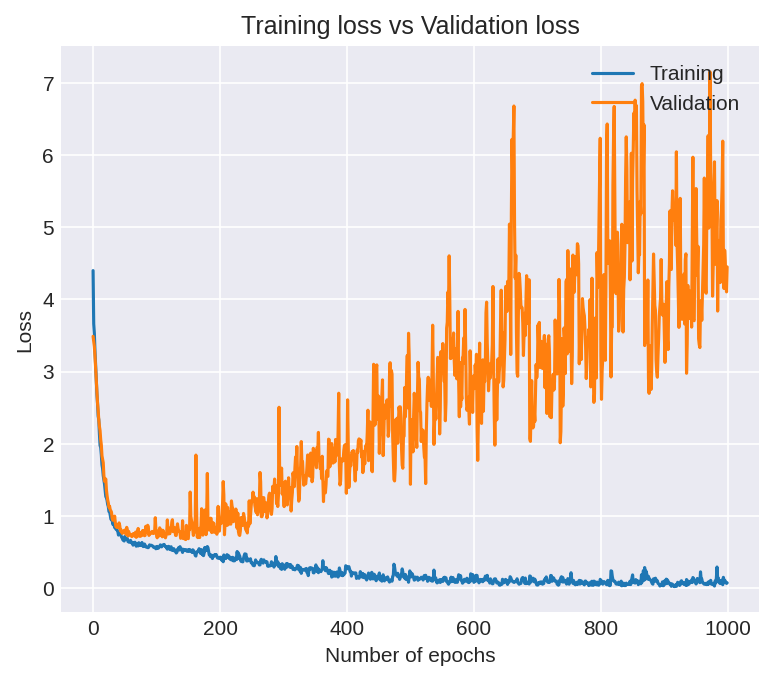

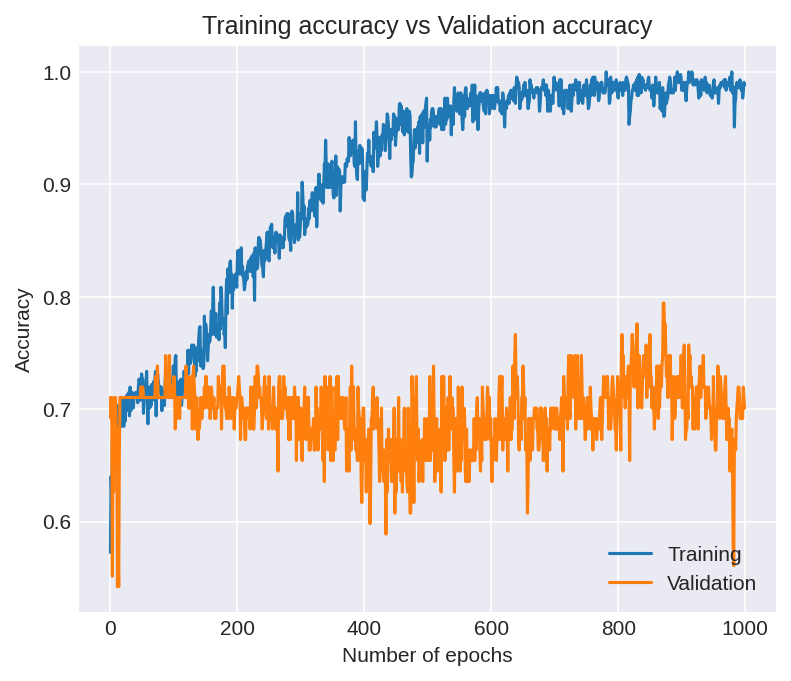

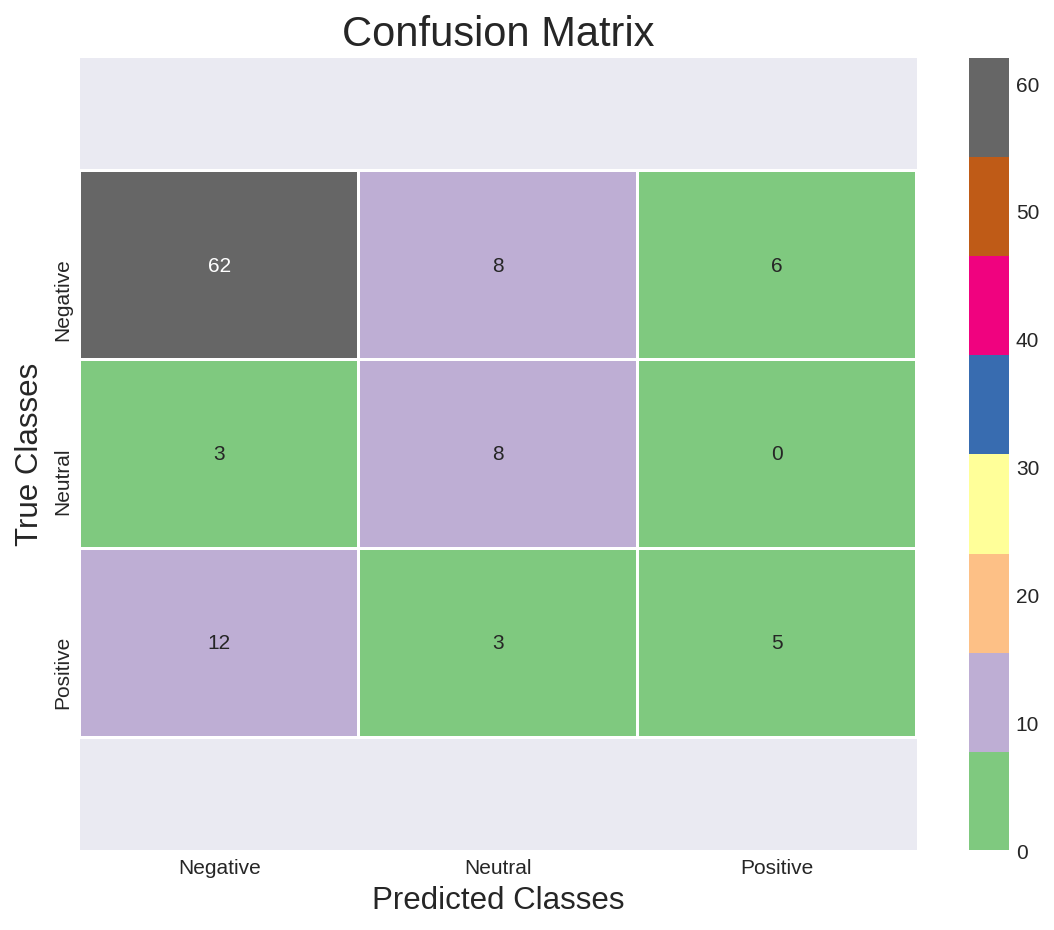

              precision    recall  f1-score   support

    Negative       0.81      0.82      0.81        76
     Neutral       0.42      0.73      0.53        11
    Positive       0.45      0.25      0.32        20

    accuracy                           0.70       107
   macro avg       0.56      0.60      0.56       107
weighted avg       0.70      0.70      0.69       107



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])     
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[40:50] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9, 7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()   
print(classification_report(TRUE, predictions, target_names = ['Negative', 'Neutral', 'Positive']))

In [27]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(512))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(X_train, y_train,batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 155, 256)          2304      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 74, 256)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 74, 256)           1024      
_________________________________________________________________
dropout (Dropout)            (None, 74, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 37, 256)          

4/4 [==============================] - 0s 8ms/step - loss: 3.9428 - accuracy: 0.6542
Loss of the model is -  3.9428176879882812
4/4 [==============================] - 0s 8ms/step - loss: 3.9428 - accuracy: 0.6542
Accuracy of the model is -  65.42056202888489 %


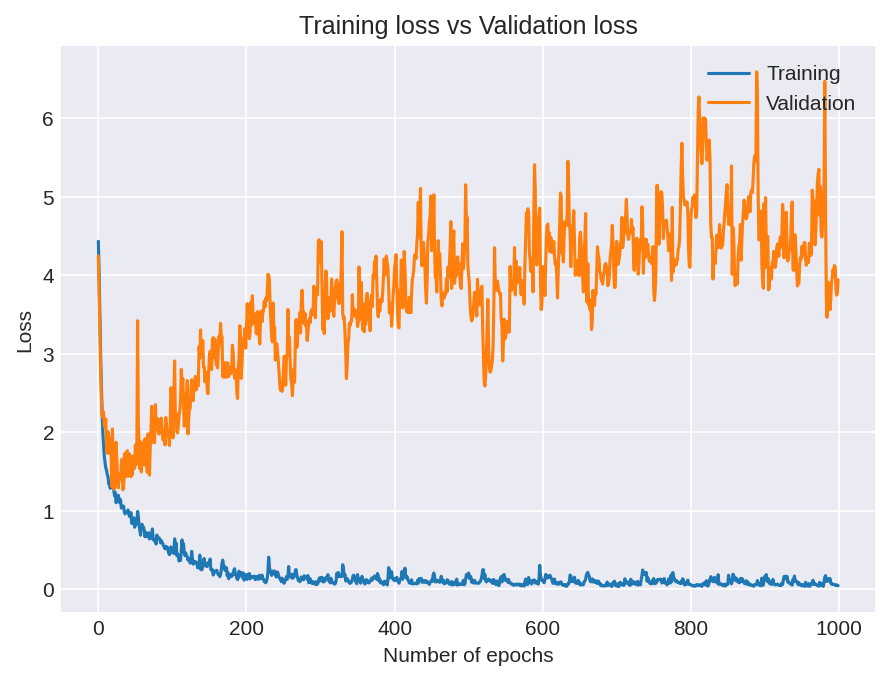

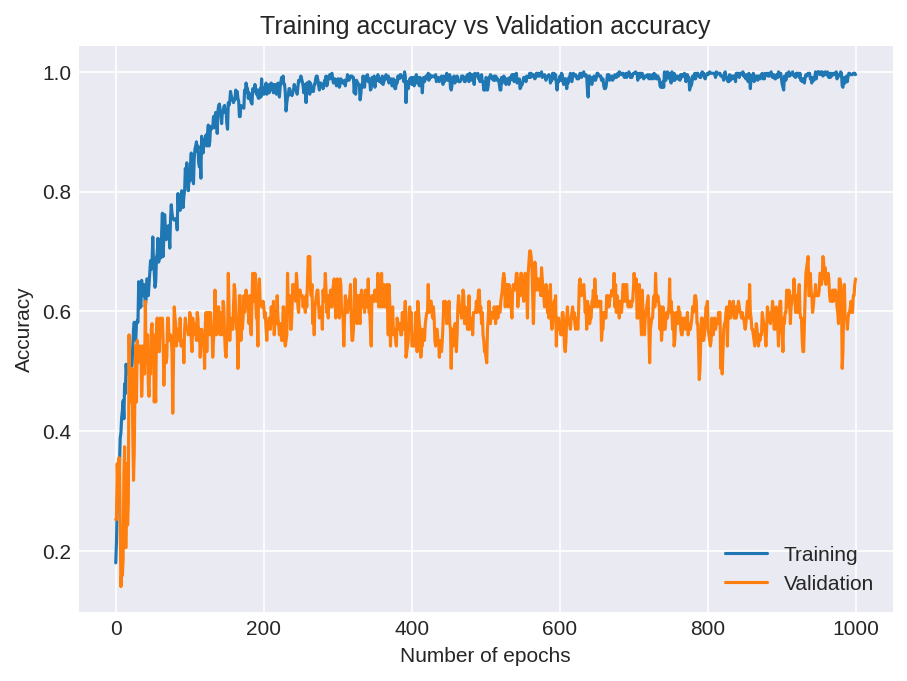

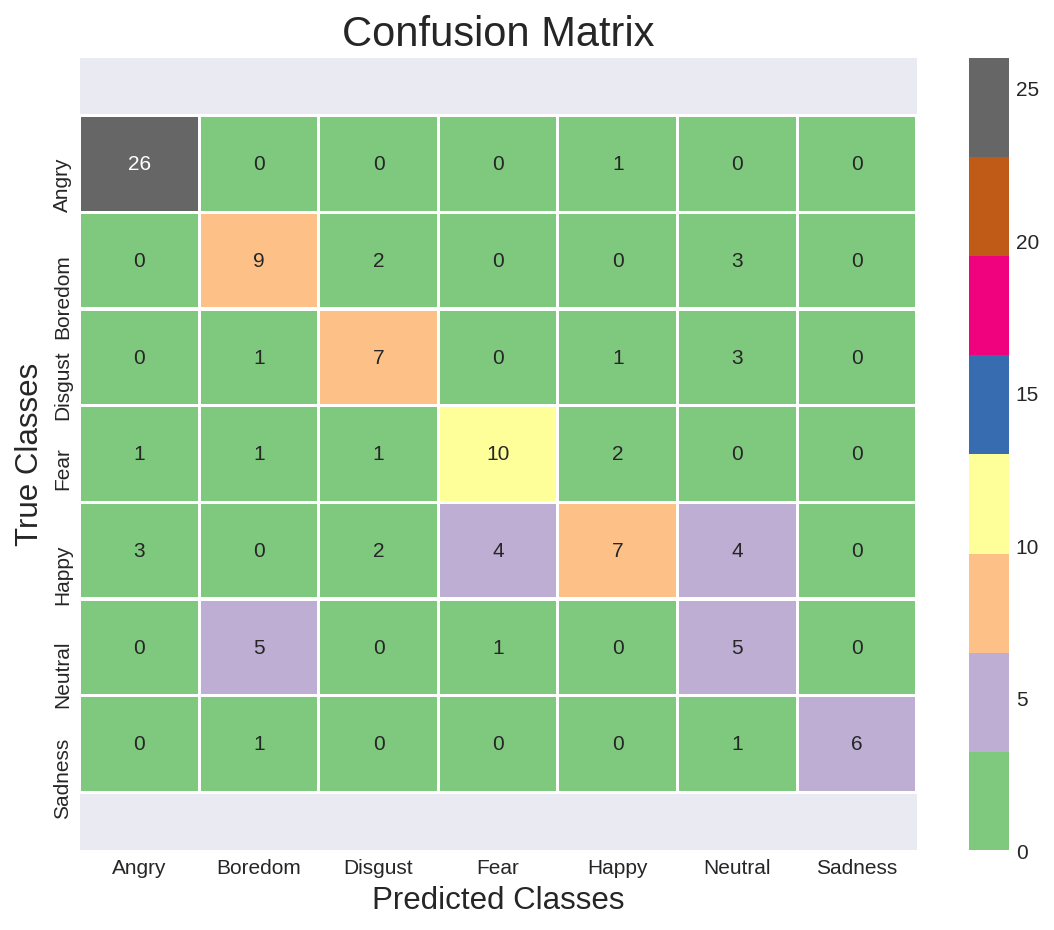

              precision    recall  f1-score   support

       Angry       0.87      0.96      0.91        27
     Boredom       0.53      0.64      0.58        14
     Disgust       0.58      0.58      0.58        12
        Fear       0.67      0.67      0.67        15
       Happy       0.64      0.35      0.45        20
     Neutral       0.31      0.45      0.37        11
     Sadness       1.00      0.75      0.86         8

    accuracy                           0.65       107
   macro avg       0.66      0.63      0.63       107
weighted avg       0.67      0.65      0.65       107



In [29]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('emo-db.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Boredom', 'Disgust', 'Fear', 'Happy', 'Neutral','Sadness']))

In [30]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(X_train, y_train,batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 155, 256)          2304      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 74, 256)           0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 74, 256)           1024      
_________________________________________________________________
dropout_10 (Dropout)         (None, 74, 256)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 37, 256)          

4/4 [==============================] - 0s 7ms/step - loss: 4.6183 - accuracy: 0.6355
Loss of the model is -  4.618304252624512
4/4 [==============================] - 0s 7ms/step - loss: 4.6183 - accuracy: 0.6355
Accuracy of the model is -  63.55140209197998 %


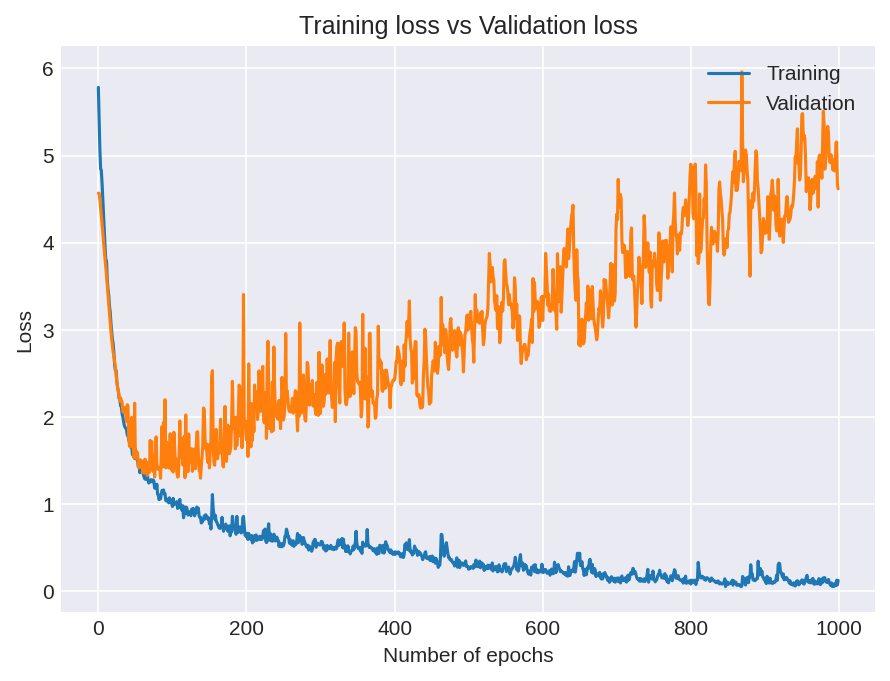

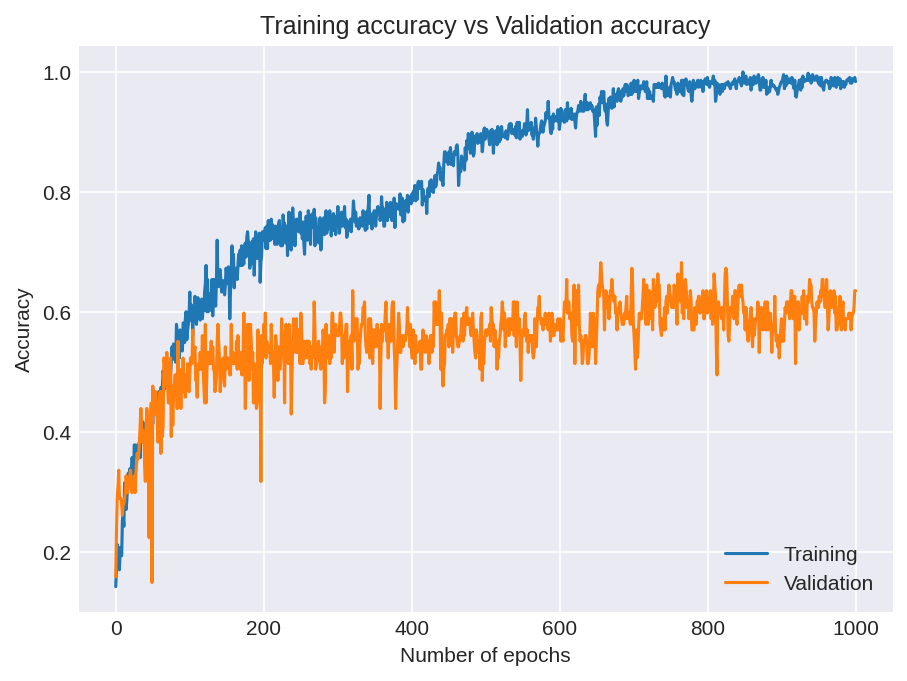

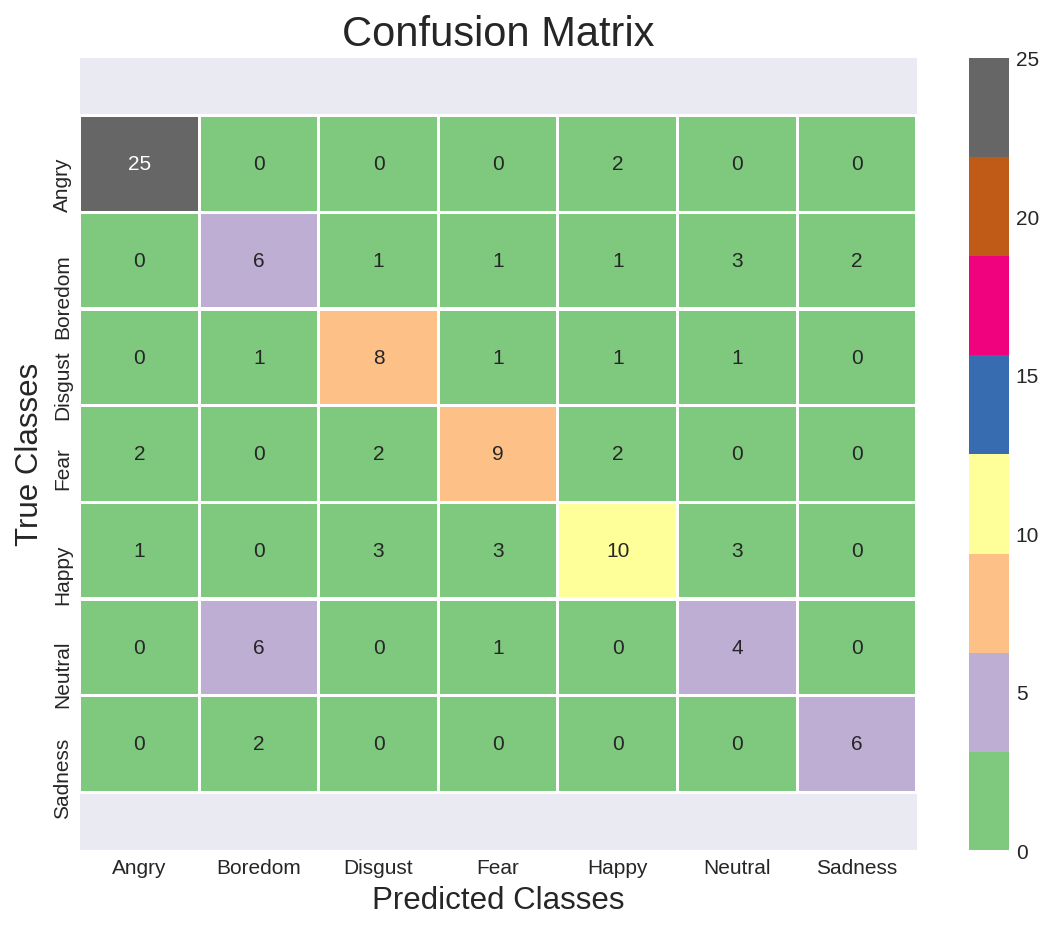

              precision    recall  f1-score   support

       Angry       0.89      0.93      0.91        27
     Boredom       0.40      0.43      0.41        14
     Disgust       0.57      0.67      0.62        12
        Fear       0.60      0.60      0.60        15
       Happy       0.62      0.50      0.56        20
     Neutral       0.36      0.36      0.36        11
     Sadness       0.75      0.75      0.75         8

    accuracy                           0.64       107
   macro avg       0.60      0.60      0.60       107
weighted avg       0.64      0.64      0.63       107



In [32]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('emo-db.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Boredom', 'Disgust', 'Fear', 'Happy', 'Neutral','Sadness']))